In [85]:
# Data reading 
import pandas as pd 

# Array math 
import numpy as np

# Dates 
import datetime

# Ploting 
import matplotlib.pyplot as plt 

# Deep learning
import tensorflow as tf 

# Keras API 
from tensorflow import keras

# Deep learning 
from keras.models import Input, Model
from keras.layers import Dense
from keras import losses

In [86]:
# Downloading data 
!python3 dataDownload.py

# Creating tidy data
!python3 createTidyData.py

Read municipality data in 0.62 seconds
Rows read: 13853
Read patient data in 1.68 seconds
Rows read: 34758
Data saved in data/2020-11-15


In [87]:
# Reading the data 
d = pd.read_csv('data/tidy_data.csv')

# Sorting by date 
d['day'] = [datetime.datetime.strptime(x, '%Y-%m-%d').date() for x in d['day']]
d.sort_values('day', inplace=True)

In [88]:
# Saving the last row for prediction 
xtest = d.iloc[-1]

In [89]:
# Extracting the Y column
Y = d['is_covid'].values.tolist()

# Lagging all the data 
d = d.shift(1)
d['Y'] = Y

# Droping the first row 
d = d.drop(0)
d.reset_index(inplace=True, drop=True)

In [90]:
# Creating X and Y matrices for deep learning 
X, Y = d.drop(['day', 'is_covid', 'Y'], axis=1), d['Y']

In [95]:
# Input shape
inputRegression = Input(shape=(X.shape[1], ))

# One neuron in the hidden layer with the linear activation function for regression
neuron = Dense(1, activation='linear')(inputRegression)

# Defining the model
model = Model(inputRegression, neuron)

In [96]:
# Initiating the optimizer
optimizer = keras.optimizers.SGD(learning_rate=0.00001)

# Compiling the model
model.compile(loss=losses.MeanSquaredError(), optimizer=optimizer)

# Fitting the model
history = model.fit(X, Y, epochs = 5000, batch_size=64)

Epoch 1/5000
4/4 [==============================] - 0s 690us/step - loss: 95743.5938
Epoch 2/5000
4/4 [==============================] - 0s 693us/step - loss: 24855.0117
Epoch 3/5000
4/4 [==============================] - 0s 705us/step - loss: 15547.8271
Epoch 4/5000
4/4 [==============================] - 0s 685us/step - loss: 8167.0112
Epoch 5/5000
4/4 [==============================] - 0s 642us/step - loss: 13966.5518
Epoch 6/5000
4/4 [==============================] - 0s 671us/step - loss: 47875.7930
Epoch 7/5000
4/4 [==============================] - 0s 2ms/step - loss: 20927.8418
Epoch 8/5000
4/4 [==============================] - 0s 1ms/step - loss: 13552.1504
Epoch 9/5000
4/4 [==============================] - 0s 1ms/step - loss: 22154.4707
Epoch 10/5000
4/4 [==============================] - 0s 718us/step - loss: 114587.4688
Epoch 11/5000
4/4 [==============================] - 0s 1ms/step - loss: 59096.5117
Epoch 12/5000
4/4 [==============================] - 0s 950us/step - lo

4/4 [==============================] - 0s 828us/step - loss: 13548.8486
Epoch 98/5000
4/4 [==============================] - 0s 643us/step - loss: 4664.8105
Epoch 99/5000
4/4 [==============================] - 0s 737us/step - loss: 6850.1050
Epoch 100/5000
4/4 [==============================] - 0s 624us/step - loss: 8499.9287
Epoch 101/5000
4/4 [==============================] - 0s 653us/step - loss: 18581.2285
Epoch 102/5000
4/4 [==============================] - 0s 589us/step - loss: 12315.9922
Epoch 103/5000
4/4 [==============================] - 0s 705us/step - loss: 21306.3340
Epoch 104/5000
4/4 [==============================] - 0s 774us/step - loss: 32365.3301
Epoch 105/5000
4/4 [==============================] - 0s 595us/step - loss: 7887.5894
Epoch 106/5000
4/4 [==============================] - 0s 701us/step - loss: 22717.6230
Epoch 107/5000
4/4 [==============================] - 0s 1ms/step - loss: 8400.8662
Epoch 108/5000
4/4 [==============================] - 0s 734us/step

4/4 [==============================] - 0s 781us/step - loss: 5092.2036
Epoch 193/5000
4/4 [==============================] - 0s 1ms/step - loss: 19006.7715
Epoch 194/5000
4/4 [==============================] - 0s 726us/step - loss: 13847.8066
Epoch 195/5000
4/4 [==============================] - 0s 1ms/step - loss: 5057.8018
Epoch 196/5000
4/4 [==============================] - 0s 709us/step - loss: 3780.7244
Epoch 197/5000
4/4 [==============================] - 0s 791us/step - loss: 3329.0818
Epoch 198/5000
4/4 [==============================] - 0s 894us/step - loss: 11030.7393
Epoch 199/5000
4/4 [==============================] - 0s 693us/step - loss: 3740.9338
Epoch 200/5000
4/4 [==============================] - 0s 734us/step - loss: 5396.9380
Epoch 201/5000
4/4 [==============================] - 0s 1ms/step - loss: 7466.8105
Epoch 202/5000
4/4 [==============================] - 0s 649us/step - loss: 13421.4746
Epoch 203/5000
4/4 [==============================] - 0s 653us/step - l

4/4 [==============================] - 0s 808us/step - loss: 3095.1843
Epoch 289/5000
4/4 [==============================] - 0s 719us/step - loss: 3319.1189
Epoch 290/5000
4/4 [==============================] - 0s 541us/step - loss: 2817.5095
Epoch 291/5000
4/4 [==============================] - 0s 2ms/step - loss: 2764.2529
Epoch 292/5000
4/4 [==============================] - 0s 764us/step - loss: 3759.8167
Epoch 293/5000
4/4 [==============================] - 0s 669us/step - loss: 3980.2881
Epoch 294/5000
4/4 [==============================] - 0s 778us/step - loss: 2697.0425
Epoch 295/5000
4/4 [==============================] - 0s 1ms/step - loss: 4275.9990
Epoch 296/5000
4/4 [==============================] - 0s 633us/step - loss: 2609.3311
Epoch 297/5000
4/4 [==============================] - 0s 2ms/step - loss: 2643.2546
Epoch 298/5000
4/4 [==============================] - 0s 702us/step - loss: 2617.3826
Epoch 299/5000
4/4 [==============================] - 0s 630us/step - loss:

4/4 [==============================] - 0s 1ms/step - loss: 2365.1841
Epoch 384/5000
4/4 [==============================] - 0s 874us/step - loss: 2591.6184
Epoch 385/5000
4/4 [==============================] - 0s 1ms/step - loss: 2343.1069
Epoch 386/5000
4/4 [==============================] - 0s 1ms/step - loss: 8746.7119
Epoch 387/5000
4/4 [==============================] - 0s 683us/step - loss: 4729.4639
Epoch 388/5000
4/4 [==============================] - 0s 937us/step - loss: 2237.0620
Epoch 389/5000
4/4 [==============================] - 0s 1ms/step - loss: 2586.4309
Epoch 390/5000
4/4 [==============================] - 0s 777us/step - loss: 3077.3457
Epoch 391/5000
4/4 [==============================] - 0s 1ms/step - loss: 3869.1902
Epoch 392/5000
4/4 [==============================] - 0s 867us/step - loss: 4180.4761
Epoch 393/5000
4/4 [==============================] - 0s 2ms/step - loss: 2301.7847
Epoch 394/5000
4/4 [==============================] - 0s 734us/step - loss: 2770.

4/4 [==============================] - 0s 603us/step - loss: 2748.6016
Epoch 480/5000
4/4 [==============================] - 0s 751us/step - loss: 4531.7363
Epoch 481/5000
4/4 [==============================] - 0s 724us/step - loss: 2305.7869
Epoch 482/5000
4/4 [==============================] - 0s 1ms/step - loss: 2196.4519
Epoch 483/5000
4/4 [==============================] - 0s 1ms/step - loss: 2000.7814
Epoch 484/5000
4/4 [==============================] - 0s 1ms/step - loss: 2041.2533
Epoch 485/5000
4/4 [==============================] - 0s 2ms/step - loss: 2619.3257
Epoch 486/5000
4/4 [==============================] - 0s 962us/step - loss: 10993.2744
Epoch 487/5000
4/4 [==============================] - 0s 1ms/step - loss: 2846.8962
Epoch 488/5000
4/4 [==============================] - 0s 795us/step - loss: 4656.5762
Epoch 489/5000
4/4 [==============================] - 0s 1ms/step - loss: 3158.5642
Epoch 490/5000
4/4 [==============================] - 0s 689us/step - loss: 5013

4/4 [==============================] - 0s 1ms/step - loss: 2011.8282
Epoch 576/5000
4/4 [==============================] - 0s 608us/step - loss: 2023.8069
Epoch 577/5000
4/4 [==============================] - 0s 2ms/step - loss: 2687.8550
Epoch 578/5000
4/4 [==============================] - 0s 668us/step - loss: 7467.1143
Epoch 579/5000
4/4 [==============================] - 0s 618us/step - loss: 1761.0715
Epoch 580/5000
4/4 [==============================] - 0s 841us/step - loss: 3578.1243
Epoch 581/5000
4/4 [==============================] - 0s 793us/step - loss: 1862.9631
Epoch 582/5000
4/4 [==============================] - 0s 706us/step - loss: 2048.0725
Epoch 583/5000
4/4 [==============================] - 0s 2ms/step - loss: 2034.1564
Epoch 584/5000
4/4 [==============================] - 0s 760us/step - loss: 2282.1807
Epoch 585/5000
4/4 [==============================] - 0s 2ms/step - loss: 2175.7507
Epoch 586/5000
4/4 [==============================] - 0s 875us/step - loss: 1

Epoch 671/5000
4/4 [==============================] - 0s 692us/step - loss: 3758.7271
Epoch 672/5000
4/4 [==============================] - 0s 755us/step - loss: 1545.9980
Epoch 673/5000
4/4 [==============================] - 0s 676us/step - loss: 1672.7952
Epoch 674/5000
4/4 [==============================] - 0s 895us/step - loss: 1865.7828
Epoch 675/5000
4/4 [==============================] - 0s 1ms/step - loss: 2708.5190
Epoch 676/5000
4/4 [==============================] - 0s 673us/step - loss: 1699.8025
Epoch 677/5000
4/4 [==============================] - 0s 1ms/step - loss: 1926.1493
Epoch 678/5000
4/4 [==============================] - 0s 685us/step - loss: 2259.8374
Epoch 679/5000
4/4 [==============================] - 0s 669us/step - loss: 3443.6533
Epoch 680/5000
4/4 [==============================] - 0s 1ms/step - loss: 1610.4227
Epoch 681/5000
4/4 [==============================] - 0s 1ms/step - loss: 1580.4724
Epoch 682/5000
4/4 [==============================] - 0s 1ms/s

4/4 [==============================] - 0s 961us/step - loss: 1620.6119
Epoch 767/5000
4/4 [==============================] - 0s 789us/step - loss: 1674.8175
Epoch 768/5000
4/4 [==============================] - 0s 927us/step - loss: 1754.5667
Epoch 769/5000
4/4 [==============================] - 0s 574us/step - loss: 1494.2056
Epoch 770/5000
4/4 [==============================] - 0s 732us/step - loss: 1434.1940
Epoch 771/5000
4/4 [==============================] - 0s 1ms/step - loss: 2485.5430
Epoch 772/5000
4/4 [==============================] - 0s 1ms/step - loss: 5846.8013
Epoch 773/5000
4/4 [==============================] - 0s 816us/step - loss: 1901.7854
Epoch 774/5000
4/4 [==============================] - 0s 763us/step - loss: 2422.3943
Epoch 775/5000
4/4 [==============================] - 0s 694us/step - loss: 1520.8450
Epoch 776/5000
4/4 [==============================] - 0s 824us/step - loss: 2822.3281
Epoch 777/5000
4/4 [==============================] - 0s 831us/step - los

4/4 [==============================] - 0s 2ms/step - loss: 2121.6821
Epoch 863/5000
4/4 [==============================] - 0s 792us/step - loss: 2178.6296
Epoch 864/5000
4/4 [==============================] - 0s 764us/step - loss: 1480.0485
Epoch 865/5000
4/4 [==============================] - 0s 822us/step - loss: 1474.1949
Epoch 866/5000
4/4 [==============================] - 0s 1ms/step - loss: 1523.2654
Epoch 867/5000
4/4 [==============================] - 0s 799us/step - loss: 3252.4641
Epoch 868/5000
4/4 [==============================] - 0s 779us/step - loss: 1498.9778
Epoch 869/5000
4/4 [==============================] - 0s 2ms/step - loss: 2645.3337
Epoch 870/5000
4/4 [==============================] - 0s 687us/step - loss: 1913.0326
Epoch 871/5000
4/4 [==============================] - 0s 1ms/step - loss: 1453.5427
Epoch 872/5000
4/4 [==============================] - 0s 738us/step - loss: 1374.4271
Epoch 873/5000
4/4 [==============================] - 0s 819us/step - loss: 1

Epoch 958/5000
4/4 [==============================] - 0s 946us/step - loss: 2078.5879
Epoch 959/5000
4/4 [==============================] - 0s 732us/step - loss: 3509.6138
Epoch 960/5000
4/4 [==============================] - 0s 1ms/step - loss: 2147.3606
Epoch 961/5000
4/4 [==============================] - 0s 634us/step - loss: 1457.2139
Epoch 962/5000
4/4 [==============================] - 0s 1ms/step - loss: 1433.5844
Epoch 963/5000
4/4 [==============================] - 0s 2ms/step - loss: 1636.2500
Epoch 964/5000
4/4 [==============================] - 0s 722us/step - loss: 1668.9430
Epoch 965/5000
4/4 [==============================] - 0s 829us/step - loss: 3773.1355
Epoch 966/5000
4/4 [==============================] - 0s 941us/step - loss: 1814.7593
Epoch 967/5000
4/4 [==============================] - 0s 597us/step - loss: 1682.4122
Epoch 968/5000
4/4 [==============================] - 0s 1ms/step - loss: 1298.4539
Epoch 969/5000
4/4 [==============================] - 0s 744us

4/4 [==============================] - 0s 691us/step - loss: 1417.9042
Epoch 1053/5000
4/4 [==============================] - 0s 933us/step - loss: 1928.2605
Epoch 1054/5000
4/4 [==============================] - 0s 826us/step - loss: 1312.4137
Epoch 1055/5000
4/4 [==============================] - 0s 1ms/step - loss: 2415.8992
Epoch 1056/5000
4/4 [==============================] - 0s 1ms/step - loss: 21146.3652
Epoch 1057/5000
4/4 [==============================] - 0s 787us/step - loss: 14289.1494
Epoch 1058/5000
4/4 [==============================] - 0s 782us/step - loss: 1303.1813
Epoch 1059/5000
4/4 [==============================] - 0s 799us/step - loss: 1240.5181
Epoch 1060/5000
4/4 [==============================] - 0s 966us/step - loss: 1223.2205
Epoch 1061/5000
4/4 [==============================] - 0s 795us/step - loss: 1269.0720
Epoch 1062/5000
4/4 [==============================] - 0s 3ms/step - loss: 1249.1111
Epoch 1063/5000
4/4 [==============================] - 0s 770us

4/4 [==============================] - 0s 768us/step - loss: 1289.8060
Epoch 1147/5000
4/4 [==============================] - 0s 727us/step - loss: 1283.0190
Epoch 1148/5000
4/4 [==============================] - 0s 1ms/step - loss: 1308.7455
Epoch 1149/5000
4/4 [==============================] - 0s 840us/step - loss: 1687.0261
Epoch 1150/5000
4/4 [==============================] - 0s 1ms/step - loss: 2176.4377
Epoch 1151/5000
4/4 [==============================] - 0s 742us/step - loss: 1267.0969
Epoch 1152/5000
4/4 [==============================] - 0s 657us/step - loss: 1345.2234
Epoch 1153/5000
4/4 [==============================] - 0s 796us/step - loss: 1173.1589
Epoch 1154/5000
4/4 [==============================] - 0s 727us/step - loss: 1145.6450
Epoch 1155/5000
4/4 [==============================] - 0s 849us/step - loss: 1173.6941
Epoch 1156/5000
4/4 [==============================] - 0s 926us/step - loss: 1165.9166
Epoch 1157/5000
4/4 [==============================] - 0s 710us

4/4 [==============================] - 0s 802us/step - loss: 1120.0321
Epoch 1241/5000
4/4 [==============================] - 0s 601us/step - loss: 1301.4565
Epoch 1242/5000
4/4 [==============================] - 0s 626us/step - loss: 1309.4902
Epoch 1243/5000
4/4 [==============================] - 0s 1ms/step - loss: 1402.6287
Epoch 1244/5000
4/4 [==============================] - 0s 1ms/step - loss: 1082.4254
Epoch 1245/5000
4/4 [==============================] - 0s 731us/step - loss: 1072.0128
Epoch 1246/5000
4/4 [==============================] - 0s 823us/step - loss: 1200.8318
Epoch 1247/5000
4/4 [==============================] - 0s 709us/step - loss: 1106.0410
Epoch 1248/5000
4/4 [==============================] - 0s 597us/step - loss: 1291.0145
Epoch 1249/5000
4/4 [==============================] - 0s 804us/step - loss: 3144.4119
Epoch 1250/5000
4/4 [==============================] - 0s 1ms/step - loss: 1626.7411
Epoch 1251/5000
4/4 [==============================] - 0s 676us/s

Epoch 1335/5000
4/4 [==============================] - 0s 781us/step - loss: 1239.0339
Epoch 1336/5000
4/4 [==============================] - 0s 717us/step - loss: 1412.2539
Epoch 1337/5000
4/4 [==============================] - 0s 798us/step - loss: 1131.2832
Epoch 1338/5000
4/4 [==============================] - 0s 760us/step - loss: 1561.7388
Epoch 1339/5000
4/4 [==============================] - 0s 2ms/step - loss: 1053.8395
Epoch 1340/5000
4/4 [==============================] - 0s 754us/step - loss: 1064.8715
Epoch 1341/5000
4/4 [==============================] - 0s 659us/step - loss: 2239.7642
Epoch 1342/5000
4/4 [==============================] - 0s 2ms/step - loss: 4226.8550
Epoch 1343/5000
4/4 [==============================] - 0s 617us/step - loss: 2543.3730
Epoch 1344/5000
4/4 [==============================] - 0s 682us/step - loss: 1280.6204
Epoch 1345/5000
4/4 [==============================] - 0s 2ms/step - loss: 1132.7635
Epoch 1346/5000
4/4 [============================

4/4 [==============================] - 0s 597us/step - loss: 1043.4452
Epoch 1430/5000
4/4 [==============================] - 0s 639us/step - loss: 1010.7853
Epoch 1431/5000
4/4 [==============================] - 0s 614us/step - loss: 1042.9004
Epoch 1432/5000
4/4 [==============================] - 0s 1ms/step - loss: 1124.8198
Epoch 1433/5000
4/4 [==============================] - 0s 1ms/step - loss: 1660.8730
Epoch 1434/5000
4/4 [==============================] - 0s 617us/step - loss: 1140.1694
Epoch 1435/5000
4/4 [==============================] - 0s 867us/step - loss: 1040.0453
Epoch 1436/5000
4/4 [==============================] - 0s 923us/step - loss: 1105.2454
Epoch 1437/5000
4/4 [==============================] - 0s 714us/step - loss: 2196.5864
Epoch 1438/5000
4/4 [==============================] - 0s 696us/step - loss: 1145.7482
Epoch 1439/5000
4/4 [==============================] - 0s 1ms/step - loss: 1592.8600
Epoch 1440/5000
4/4 [==============================] - 0s 889us/s

4/4 [==============================] - 0s 2ms/step - loss: 1057.8348
Epoch 1524/5000
4/4 [==============================] - 0s 721us/step - loss: 1133.2828
Epoch 1525/5000
4/4 [==============================] - 0s 832us/step - loss: 974.9484
Epoch 1526/5000
4/4 [==============================] - 0s 692us/step - loss: 1011.6292
Epoch 1527/5000
4/4 [==============================] - 0s 768us/step - loss: 971.6160
Epoch 1528/5000
4/4 [==============================] - 0s 1ms/step - loss: 1641.8472
Epoch 1529/5000
4/4 [==============================] - 0s 767us/step - loss: 7886.8145
Epoch 1530/5000
4/4 [==============================] - 0s 769us/step - loss: 1939.5685
Epoch 1531/5000
4/4 [==============================] - 0s 751us/step - loss: 1025.6931
Epoch 1532/5000
4/4 [==============================] - 0s 762us/step - loss: 962.5054
Epoch 1533/5000
4/4 [==============================] - 0s 1ms/step - loss: 1032.4076
Epoch 1534/5000
4/4 [==============================] - 0s 709us/step

4/4 [==============================] - 0s 1ms/step - loss: 985.4321
Epoch 1619/5000
4/4 [==============================] - 0s 683us/step - loss: 940.0975
Epoch 1620/5000
4/4 [==============================] - 0s 940us/step - loss: 984.7604
Epoch 1621/5000
4/4 [==============================] - 0s 671us/step - loss: 1094.0392
Epoch 1622/5000
4/4 [==============================] - 0s 813us/step - loss: 1217.5082
Epoch 1623/5000
4/4 [==============================] - 0s 746us/step - loss: 1153.8284
Epoch 1624/5000
4/4 [==============================] - 0s 663us/step - loss: 1357.3030
Epoch 1625/5000
4/4 [==============================] - 0s 647us/step - loss: 1062.3114
Epoch 1626/5000
4/4 [==============================] - 0s 756us/step - loss: 1382.7280
Epoch 1627/5000
4/4 [==============================] - 0s 718us/step - loss: 3447.4690
Epoch 1628/5000
4/4 [==============================] - 0s 782us/step - loss: 987.2449
Epoch 1629/5000
4/4 [==============================] - 0s 927us/s

Epoch 1713/5000
4/4 [==============================] - 0s 686us/step - loss: 1379.8778
Epoch 1714/5000
4/4 [==============================] - 0s 724us/step - loss: 915.0507
Epoch 1715/5000
4/4 [==============================] - 0s 743us/step - loss: 1136.0471
Epoch 1716/5000
4/4 [==============================] - 0s 803us/step - loss: 2016.0756
Epoch 1717/5000
4/4 [==============================] - 0s 711us/step - loss: 1288.5785
Epoch 1718/5000
4/4 [==============================] - 0s 741us/step - loss: 1398.9536
Epoch 1719/5000
4/4 [==============================] - 0s 1ms/step - loss: 1048.5820
Epoch 1720/5000
4/4 [==============================] - 0s 745us/step - loss: 1294.1089
Epoch 1721/5000
4/4 [==============================] - 0s 679us/step - loss: 906.6620
Epoch 1722/5000
4/4 [==============================] - 0s 794us/step - loss: 1187.3002
Epoch 1723/5000
4/4 [==============================] - 0s 828us/step - loss: 974.2555
Epoch 1724/5000
4/4 [===========================

4/4 [==============================] - 0s 598us/step - loss: 1513.3633
Epoch 1809/5000
4/4 [==============================] - 0s 715us/step - loss: 1027.2488
Epoch 1810/5000
4/4 [==============================] - 0s 961us/step - loss: 904.8646
Epoch 1811/5000
4/4 [==============================] - 0s 593us/step - loss: 1138.5760
Epoch 1812/5000
4/4 [==============================] - 0s 1ms/step - loss: 1611.6328
Epoch 1813/5000
4/4 [==============================] - 0s 889us/step - loss: 1363.7606
Epoch 1814/5000
4/4 [==============================] - 0s 826us/step - loss: 886.7606
Epoch 1815/5000
4/4 [==============================] - 0s 659us/step - loss: 1028.0411
Epoch 1816/5000
4/4 [==============================] - 0s 685us/step - loss: 928.7977
Epoch 1817/5000
4/4 [==============================] - 0s 823us/step - loss: 946.0074
Epoch 1818/5000
4/4 [==============================] - 0s 839us/step - loss: 1517.4087
Epoch 1819/5000
4/4 [==============================] - 0s 986us/s

4/4 [==============================] - 0s 694us/step - loss: 1268.8154
Epoch 1904/5000
4/4 [==============================] - 0s 699us/step - loss: 939.5670
Epoch 1905/5000
4/4 [==============================] - 0s 763us/step - loss: 1350.8616
Epoch 1906/5000
4/4 [==============================] - 0s 754us/step - loss: 1316.1776
Epoch 1907/5000
4/4 [==============================] - 0s 615us/step - loss: 872.7816
Epoch 1908/5000
4/4 [==============================] - 0s 569us/step - loss: 1042.7487
Epoch 1909/5000
4/4 [==============================] - 0s 2ms/step - loss: 971.7869
Epoch 1910/5000
4/4 [==============================] - 0s 736us/step - loss: 870.6325
Epoch 1911/5000
4/4 [==============================] - 0s 854us/step - loss: 855.2194
Epoch 1912/5000
4/4 [==============================] - 0s 793us/step - loss: 915.2982
Epoch 1913/5000
4/4 [==============================] - 0s 1ms/step - loss: 879.3260
Epoch 1914/5000
4/4 [==============================] - 0s 1ms/step - l

4/4 [==============================] - 0s 697us/step - loss: 1415.9431
Epoch 1999/5000
4/4 [==============================] - 0s 726us/step - loss: 876.9867
Epoch 2000/5000
4/4 [==============================] - 0s 715us/step - loss: 841.2446
Epoch 2001/5000
4/4 [==============================] - 0s 1ms/step - loss: 865.3113
Epoch 2002/5000
4/4 [==============================] - 0s 678us/step - loss: 1127.6875
Epoch 2003/5000
4/4 [==============================] - 0s 2ms/step - loss: 900.5142
Epoch 2004/5000
4/4 [==============================] - 0s 683us/step - loss: 1264.1671
Epoch 2005/5000
4/4 [==============================] - 0s 633us/step - loss: 1080.2869
Epoch 2006/5000
4/4 [==============================] - 0s 885us/step - loss: 1049.7003
Epoch 2007/5000
4/4 [==============================] - 0s 779us/step - loss: 948.9563
Epoch 2008/5000
4/4 [==============================] - 0s 677us/step - loss: 852.8892
Epoch 2009/5000
4/4 [==============================] - 0s 820us/step 

4/4 [==============================] - 0s 1ms/step - loss: 1301.5750
Epoch 2094/5000
4/4 [==============================] - 0s 829us/step - loss: 1757.3121
Epoch 2095/5000
4/4 [==============================] - 0s 906us/step - loss: 828.3951
Epoch 2096/5000
4/4 [==============================] - 0s 1ms/step - loss: 864.6929
Epoch 2097/5000
4/4 [==============================] - 0s 616us/step - loss: 927.2725
Epoch 2098/5000
4/4 [==============================] - 0s 1ms/step - loss: 1268.3666
Epoch 2099/5000
4/4 [==============================] - 0s 719us/step - loss: 1986.7891
Epoch 2100/5000
4/4 [==============================] - 0s 2ms/step - loss: 1049.7419
Epoch 2101/5000
4/4 [==============================] - 0s 843us/step - loss: 941.8951
Epoch 2102/5000
4/4 [==============================] - 0s 1ms/step - loss: 889.5522
Epoch 2103/5000
4/4 [==============================] - 0s 791us/step - loss: 1329.5243
Epoch 2104/5000
4/4 [==============================] - 0s 1ms/step - loss:

4/4 [==============================] - 0s 727us/step - loss: 801.2919
Epoch 2189/5000
4/4 [==============================] - 0s 907us/step - loss: 998.5043
Epoch 2190/5000
4/4 [==============================] - 0s 850us/step - loss: 1072.3976
Epoch 2191/5000
4/4 [==============================] - 0s 674us/step - loss: 1042.4850
Epoch 2192/5000
4/4 [==============================] - 0s 2ms/step - loss: 2425.4836
Epoch 2193/5000
4/4 [==============================] - 0s 804us/step - loss: 858.5779
Epoch 2194/5000
4/4 [==============================] - 0s 612us/step - loss: 829.0485
Epoch 2195/5000
4/4 [==============================] - 0s 2ms/step - loss: 800.9135
Epoch 2196/5000
4/4 [==============================] - 0s 820us/step - loss: 795.2247
Epoch 2197/5000
4/4 [==============================] - 0s 1ms/step - loss: 840.2365
Epoch 2198/5000
4/4 [==============================] - 0s 861us/step - loss: 791.7394
Epoch 2199/5000
4/4 [==============================] - 0s 1ms/step - loss

4/4 [==============================] - 0s 2ms/step - loss: 765.3944
Epoch 2284/5000
4/4 [==============================] - 0s 2ms/step - loss: 785.6220
Epoch 2285/5000
4/4 [==============================] - 0s 804us/step - loss: 898.5703
Epoch 2286/5000
4/4 [==============================] - 0s 1ms/step - loss: 997.8648
Epoch 2287/5000
4/4 [==============================] - 0s 1ms/step - loss: 1068.4016
Epoch 2288/5000
4/4 [==============================] - 0s 2ms/step - loss: 1243.2073
Epoch 2289/5000
4/4 [==============================] - 0s 682us/step - loss: 1611.9700
Epoch 2290/5000
4/4 [==============================] - 0s 1ms/step - loss: 890.1724
Epoch 2291/5000
4/4 [==============================] - 0s 779us/step - loss: 835.2917
Epoch 2292/5000
4/4 [==============================] - 0s 711us/step - loss: 914.9105
Epoch 2293/5000
4/4 [==============================] - 0s 2ms/step - loss: 2198.2703
Epoch 2294/5000
4/4 [==============================] - 0s 844us/step - loss: 787

4/4 [==============================] - 0s 694us/step - loss: 1012.2172
Epoch 2380/5000
4/4 [==============================] - 0s 762us/step - loss: 949.0977
Epoch 2381/5000
4/4 [==============================] - 0s 895us/step - loss: 1160.7455
Epoch 2382/5000
4/4 [==============================] - 0s 800us/step - loss: 3435.5593
Epoch 2383/5000
4/4 [==============================] - 0s 750us/step - loss: 1991.9071
Epoch 2384/5000
4/4 [==============================] - 0s 2ms/step - loss: 1021.3921
Epoch 2385/5000
4/4 [==============================] - 0s 710us/step - loss: 834.1502
Epoch 2386/5000
4/4 [==============================] - 0s 2ms/step - loss: 816.1785
Epoch 2387/5000
4/4 [==============================] - 0s 656us/step - loss: 765.6064
Epoch 2388/5000
4/4 [==============================] - 0s 2ms/step - loss: 860.5801
Epoch 2389/5000
4/4 [==============================] - 0s 730us/step - loss: 766.0621
Epoch 2390/5000
4/4 [==============================] - 0s 830us/step - 

4/4 [==============================] - 0s 871us/step - loss: 868.3933
Epoch 2475/5000
4/4 [==============================] - 0s 2ms/step - loss: 971.8183
Epoch 2476/5000
4/4 [==============================] - 0s 1ms/step - loss: 746.7296
Epoch 2477/5000
4/4 [==============================] - 0s 785us/step - loss: 882.1326
Epoch 2478/5000
4/4 [==============================] - 0s 665us/step - loss: 1166.7238
Epoch 2479/5000
4/4 [==============================] - 0s 746us/step - loss: 762.2462
Epoch 2480/5000
4/4 [==============================] - 0s 833us/step - loss: 1228.1500
Epoch 2481/5000
4/4 [==============================] - 0s 1ms/step - loss: 843.1320
Epoch 2482/5000
4/4 [==============================] - 0s 713us/step - loss: 783.9539
Epoch 2483/5000
4/4 [==============================] - 0s 2ms/step - loss: 881.2084
Epoch 2484/5000
4/4 [==============================] - 0s 896us/step - loss: 756.0732
Epoch 2485/5000
4/4 [==============================] - 0s 1ms/step - loss: 8

4/4 [==============================] - 0s 813us/step - loss: 907.6520
Epoch 2570/5000
4/4 [==============================] - 0s 1ms/step - loss: 746.6282
Epoch 2571/5000
4/4 [==============================] - 0s 623us/step - loss: 768.7020
Epoch 2572/5000
4/4 [==============================] - 0s 2ms/step - loss: 812.2842
Epoch 2573/5000
4/4 [==============================] - 0s 702us/step - loss: 984.9782
Epoch 2574/5000
4/4 [==============================] - 0s 722us/step - loss: 858.4299
Epoch 2575/5000
4/4 [==============================] - 0s 2ms/step - loss: 1151.9438
Epoch 2576/5000
4/4 [==============================] - 0s 653us/step - loss: 892.1508
Epoch 2577/5000
4/4 [==============================] - 0s 788us/step - loss: 813.7458
Epoch 2578/5000
4/4 [==============================] - 0s 619us/step - loss: 1021.1631
Epoch 2579/5000
4/4 [==============================] - 0s 1ms/step - loss: 725.2408
Epoch 2580/5000
4/4 [==============================] - 0s 749us/step - loss:

4/4 [==============================] - 0s 650us/step - loss: 781.7411
Epoch 2666/5000
4/4 [==============================] - 0s 1ms/step - loss: 736.7203
Epoch 2667/5000
4/4 [==============================] - 0s 894us/step - loss: 830.6115
Epoch 2668/5000
4/4 [==============================] - 0s 2ms/step - loss: 778.1992
Epoch 2669/5000
4/4 [==============================] - 0s 869us/step - loss: 750.0528
Epoch 2670/5000
4/4 [==============================] - 0s 857us/step - loss: 715.5806
Epoch 2671/5000
4/4 [==============================] - 0s 799us/step - loss: 782.1329
Epoch 2672/5000
4/4 [==============================] - 0s 2ms/step - loss: 1329.9745
Epoch 2673/5000
4/4 [==============================] - 0s 767us/step - loss: 727.8864
Epoch 2674/5000
4/4 [==============================] - 0s 1ms/step - loss: 712.9136
Epoch 2675/5000
4/4 [==============================] - 0s 713us/step - loss: 702.9214
Epoch 2676/5000
4/4 [==============================] - 0s 2ms/step - loss: 73

Epoch 2761/5000
4/4 [==============================] - 0s 1ms/step - loss: 783.3253
Epoch 2762/5000
4/4 [==============================] - 0s 682us/step - loss: 689.7926
Epoch 2763/5000
4/4 [==============================] - 0s 2ms/step - loss: 694.2865
Epoch 2764/5000
4/4 [==============================] - 0s 817us/step - loss: 708.9371
Epoch 2765/5000
4/4 [==============================] - 0s 1ms/step - loss: 957.6554
Epoch 2766/5000
4/4 [==============================] - 0s 796us/step - loss: 873.6933
Epoch 2767/5000
4/4 [==============================] - 0s 1ms/step - loss: 2257.6531
Epoch 2768/5000
4/4 [==============================] - 0s 881us/step - loss: 713.9468
Epoch 2769/5000
4/4 [==============================] - 0s 787us/step - loss: 977.3961
Epoch 2770/5000
4/4 [==============================] - 0s 699us/step - loss: 801.1673
Epoch 2771/5000
4/4 [==============================] - 0s 840us/step - loss: 1040.4814
Epoch 2772/5000
4/4 [==============================] - 0s 79

4/4 [==============================] - 0s 2ms/step - loss: 801.8503
Epoch 2857/5000
4/4 [==============================] - 0s 821us/step - loss: 915.9642
Epoch 2858/5000
4/4 [==============================] - 0s 845us/step - loss: 866.6453
Epoch 2859/5000
4/4 [==============================] - 0s 849us/step - loss: 680.1631
Epoch 2860/5000
4/4 [==============================] - 0s 1ms/step - loss: 676.9406
Epoch 2861/5000
4/4 [==============================] - 0s 759us/step - loss: 675.7381
Epoch 2862/5000
4/4 [==============================] - 0s 924us/step - loss: 727.2910
Epoch 2863/5000
4/4 [==============================] - 0s 818us/step - loss: 683.6237
Epoch 2864/5000
4/4 [==============================] - 0s 655us/step - loss: 690.4291
Epoch 2865/5000
4/4 [==============================] - 0s 869us/step - loss: 705.2751
Epoch 2866/5000
4/4 [==============================] - 0s 872us/step - loss: 891.3954
Epoch 2867/5000
4/4 [==============================] - 0s 2ms/step - loss:

4/4 [==============================] - 0s 609us/step - loss: 730.3204
Epoch 2953/5000
4/4 [==============================] - 0s 908us/step - loss: 685.3380
Epoch 2954/5000
4/4 [==============================] - 0s 990us/step - loss: 671.7347
Epoch 2955/5000
4/4 [==============================] - 0s 705us/step - loss: 678.2811
Epoch 2956/5000
4/4 [==============================] - 0s 1ms/step - loss: 807.7266
Epoch 2957/5000
4/4 [==============================] - 0s 1ms/step - loss: 723.3691
Epoch 2958/5000
4/4 [==============================] - 0s 724us/step - loss: 682.5458
Epoch 2959/5000
4/4 [==============================] - 0s 2ms/step - loss: 673.8564
Epoch 2960/5000
4/4 [==============================] - 0s 769us/step - loss: 837.5757
Epoch 2961/5000
4/4 [==============================] - 0s 1ms/step - loss: 1666.3185
Epoch 2962/5000
4/4 [==============================] - 0s 734us/step - loss: 871.2594
Epoch 2963/5000
4/4 [==============================] - 0s 1ms/step - loss: 21

4/4 [==============================] - 0s 849us/step - loss: 658.2471
Epoch 3048/5000
4/4 [==============================] - 0s 1ms/step - loss: 758.3955
Epoch 3049/5000
4/4 [==============================] - 0s 1ms/step - loss: 794.6799
Epoch 3050/5000
4/4 [==============================] - 0s 799us/step - loss: 708.5308
Epoch 3051/5000
4/4 [==============================] - 0s 1ms/step - loss: 644.8447
Epoch 3052/5000
4/4 [==============================] - 0s 823us/step - loss: 687.0721
Epoch 3053/5000
4/4 [==============================] - 0s 1ms/step - loss: 667.4005
Epoch 3054/5000
4/4 [==============================] - 0s 773us/step - loss: 688.2859
Epoch 3055/5000
4/4 [==============================] - 0s 1ms/step - loss: 736.6412
Epoch 3056/5000
4/4 [==============================] - 0s 652us/step - loss: 660.6505
Epoch 3057/5000
4/4 [==============================] - 0s 785us/step - loss: 703.7560
Epoch 3058/5000
4/4 [==============================] - 0s 1ms/step - loss: 661.6

4/4 [==============================] - 0s 662us/step - loss: 847.4755
Epoch 3144/5000
4/4 [==============================] - 0s 2ms/step - loss: 652.3789
Epoch 3145/5000
4/4 [==============================] - 0s 650us/step - loss: 668.0527
Epoch 3146/5000
4/4 [==============================] - 0s 2ms/step - loss: 657.8743
Epoch 3147/5000
4/4 [==============================] - 0s 616us/step - loss: 684.4104
Epoch 3148/5000
4/4 [==============================] - 0s 1ms/step - loss: 659.8000
Epoch 3149/5000
4/4 [==============================] - 0s 876us/step - loss: 849.8002
Epoch 3150/5000
4/4 [==============================] - 0s 2ms/step - loss: 655.8973
Epoch 3151/5000
4/4 [==============================] - 0s 696us/step - loss: 668.0491
Epoch 3152/5000
4/4 [==============================] - 0s 558us/step - loss: 971.2319
Epoch 3153/5000
4/4 [==============================] - 0s 1ms/step - loss: 751.3155
Epoch 3154/5000
4/4 [==============================] - 0s 1ms/step - loss: 734.7

4/4 [==============================] - 0s 657us/step - loss: 670.8749
Epoch 3240/5000
4/4 [==============================] - 0s 2ms/step - loss: 713.9089
Epoch 3241/5000
4/4 [==============================] - 0s 802us/step - loss: 1108.9073
Epoch 3242/5000
4/4 [==============================] - 0s 2ms/step - loss: 813.3708
Epoch 3243/5000
4/4 [==============================] - 0s 702us/step - loss: 635.5342
Epoch 3244/5000
4/4 [==============================] - 0s 960us/step - loss: 695.4109
Epoch 3245/5000
4/4 [==============================] - 0s 657us/step - loss: 634.8676
Epoch 3246/5000
4/4 [==============================] - 0s 2ms/step - loss: 648.1206
Epoch 3247/5000
4/4 [==============================] - 0s 839us/step - loss: 717.7401
Epoch 3248/5000
4/4 [==============================] - 0s 690us/step - loss: 641.3912
Epoch 3249/5000
4/4 [==============================] - 0s 840us/step - loss: 726.2197
Epoch 3250/5000
4/4 [==============================] - 0s 892us/step - loss

4/4 [==============================] - 0s 1ms/step - loss: 643.7789
Epoch 3336/5000
4/4 [==============================] - 0s 775us/step - loss: 706.3475
Epoch 3337/5000
4/4 [==============================] - 0s 1ms/step - loss: 659.3715
Epoch 3338/5000
4/4 [==============================] - 0s 971us/step - loss: 672.2361
Epoch 3339/5000
4/4 [==============================] - 0s 1ms/step - loss: 771.0424
Epoch 3340/5000
4/4 [==============================] - 0s 702us/step - loss: 664.2912
Epoch 3341/5000
4/4 [==============================] - 0s 772us/step - loss: 849.9550
Epoch 3342/5000
4/4 [==============================] - 0s 1ms/step - loss: 628.3071
Epoch 3343/5000
4/4 [==============================] - 0s 799us/step - loss: 630.7433
Epoch 3344/5000
4/4 [==============================] - 0s 1ms/step - loss: 645.8297
Epoch 3345/5000
4/4 [==============================] - 0s 1ms/step - loss: 695.9463
Epoch 3346/5000
4/4 [==============================] - 0s 1ms/step - loss: 687.472

4/4 [==============================] - 0s 1ms/step - loss: 642.2278
Epoch 3432/5000
4/4 [==============================] - 0s 865us/step - loss: 618.9279
Epoch 3433/5000
4/4 [==============================] - 0s 1ms/step - loss: 642.9726
Epoch 3434/5000
4/4 [==============================] - 0s 3ms/step - loss: 661.7884
Epoch 3435/5000
4/4 [==============================] - 0s 2ms/step - loss: 698.9768
Epoch 3436/5000
4/4 [==============================] - 0s 789us/step - loss: 615.6296
Epoch 3437/5000
4/4 [==============================] - 0s 1ms/step - loss: 695.8995
Epoch 3438/5000
4/4 [==============================] - 0s 742us/step - loss: 1410.0594
Epoch 3439/5000
4/4 [==============================] - 0s 818us/step - loss: 748.9583
Epoch 3440/5000
4/4 [==============================] - 0s 986us/step - loss: 740.4099
Epoch 3441/5000
4/4 [==============================] - 0s 622us/step - loss: 1455.5195
Epoch 3442/5000
4/4 [==============================] - 0s 1ms/step - loss: 625

4/4 [==============================] - 0s 2ms/step - loss: 662.1195
Epoch 3528/5000
4/4 [==============================] - 0s 801us/step - loss: 711.3878
Epoch 3529/5000
4/4 [==============================] - 0s 931us/step - loss: 618.2181
Epoch 3530/5000
4/4 [==============================] - 0s 809us/step - loss: 723.5765
Epoch 3531/5000
4/4 [==============================] - 0s 931us/step - loss: 646.9434
Epoch 3532/5000
4/4 [==============================] - 0s 664us/step - loss: 608.8927
Epoch 3533/5000
4/4 [==============================] - 0s 1ms/step - loss: 661.2490
Epoch 3534/5000
4/4 [==============================] - 0s 701us/step - loss: 951.3487
Epoch 3535/5000
4/4 [==============================] - 0s 728us/step - loss: 670.2634
Epoch 3536/5000
4/4 [==============================] - 0s 724us/step - loss: 675.7267
Epoch 3537/5000
4/4 [==============================] - 0s 606us/step - loss: 733.5460
Epoch 3538/5000
4/4 [==============================] - 0s 1ms/step - loss:

4/4 [==============================] - 0s 1ms/step - loss: 617.9621
Epoch 3624/5000
4/4 [==============================] - 0s 909us/step - loss: 716.3771
Epoch 3625/5000
4/4 [==============================] - 0s 728us/step - loss: 1248.2307
Epoch 3626/5000
4/4 [==============================] - 0s 804us/step - loss: 608.8999
Epoch 3627/5000
4/4 [==============================] - 0s 599us/step - loss: 601.8009
Epoch 3628/5000
4/4 [==============================] - 0s 1ms/step - loss: 613.6482
Epoch 3629/5000
4/4 [==============================] - 0s 667us/step - loss: 693.1271
Epoch 3630/5000
4/4 [==============================] - 0s 1ms/step - loss: 665.9384
Epoch 3631/5000
4/4 [==============================] - 0s 822us/step - loss: 747.2493
Epoch 3632/5000
4/4 [==============================] - 0s 1ms/step - loss: 618.7371
Epoch 3633/5000
4/4 [==============================] - 0s 1ms/step - loss: 651.5127
Epoch 3634/5000
4/4 [==============================] - 0s 886us/step - loss: 92

4/4 [==============================] - 0s 842us/step - loss: 596.1756
Epoch 3719/5000
4/4 [==============================] - 0s 908us/step - loss: 622.4733
Epoch 3720/5000
4/4 [==============================] - 0s 1ms/step - loss: 639.9971
Epoch 3721/5000
4/4 [==============================] - 0s 2ms/step - loss: 762.8193
Epoch 3722/5000
4/4 [==============================] - 0s 634us/step - loss: 726.9365
Epoch 3723/5000
4/4 [==============================] - 0s 739us/step - loss: 595.3003
Epoch 3724/5000
4/4 [==============================] - 0s 1ms/step - loss: 602.1938
Epoch 3725/5000
4/4 [==============================] - 0s 550us/step - loss: 626.3031
Epoch 3726/5000
4/4 [==============================] - 0s 1ms/step - loss: 753.1229
Epoch 3727/5000
4/4 [==============================] - 0s 705us/step - loss: 595.9499
Epoch 3728/5000
4/4 [==============================] - 0s 779us/step - loss: 682.2335
Epoch 3729/5000
4/4 [==============================] - 0s 1ms/step - loss: 653

4/4 [==============================] - 0s 789us/step - loss: 585.9633
Epoch 3814/5000
4/4 [==============================] - 0s 2ms/step - loss: 578.6782
Epoch 3815/5000
4/4 [==============================] - 0s 787us/step - loss: 594.5643
Epoch 3816/5000
4/4 [==============================] - 0s 647us/step - loss: 597.6981
Epoch 3817/5000
4/4 [==============================] - 0s 2ms/step - loss: 693.6965
Epoch 3818/5000
4/4 [==============================] - 0s 2ms/step - loss: 601.8218
Epoch 3819/5000
4/4 [==============================] - 0s 790us/step - loss: 631.7047
Epoch 3820/5000
4/4 [==============================] - 0s 2ms/step - loss: 620.2134
Epoch 3821/5000
4/4 [==============================] - 0s 760us/step - loss: 988.2286
Epoch 3822/5000
4/4 [==============================] - 0s 818us/step - loss: 984.7337
Epoch 3823/5000
4/4 [==============================] - 0s 728us/step - loss: 715.3591
Epoch 3824/5000
4/4 [==============================] - 0s 776us/step - loss: 1

4/4 [==============================] - 0s 546us/step - loss: 579.3752
Epoch 3910/5000
4/4 [==============================] - 0s 2ms/step - loss: 574.0758
Epoch 3911/5000
4/4 [==============================] - 0s 787us/step - loss: 605.8403
Epoch 3912/5000
4/4 [==============================] - 0s 2ms/step - loss: 583.4846
Epoch 3913/5000
4/4 [==============================] - 0s 2ms/step - loss: 697.0186
Epoch 3914/5000
4/4 [==============================] - 0s 628us/step - loss: 1103.7098
Epoch 3915/5000
4/4 [==============================] - 0s 805us/step - loss: 1224.4734
Epoch 3916/5000
4/4 [==============================] - 0s 1ms/step - loss: 648.9785
Epoch 3917/5000
4/4 [==============================] - 0s 715us/step - loss: 661.4260
Epoch 3918/5000
4/4 [==============================] - 0s 1ms/step - loss: 569.0958
Epoch 3919/5000
4/4 [==============================] - 0s 2ms/step - loss: 609.2795
Epoch 3920/5000
4/4 [==============================] - 0s 615us/step - loss: 639

4/4 [==============================] - 0s 725us/step - loss: 610.2097
Epoch 4006/5000
4/4 [==============================] - 0s 690us/step - loss: 574.9862
Epoch 4007/5000
4/4 [==============================] - 0s 831us/step - loss: 716.2365
Epoch 4008/5000
4/4 [==============================] - 0s 987us/step - loss: 653.1082
Epoch 4009/5000
4/4 [==============================] - 0s 2ms/step - loss: 601.0366
Epoch 4010/5000
4/4 [==============================] - 0s 699us/step - loss: 1309.5404
Epoch 4011/5000
4/4 [==============================] - 0s 2ms/step - loss: 687.4116
Epoch 4012/5000
4/4 [==============================] - 0s 642us/step - loss: 650.4137
Epoch 4013/5000
4/4 [==============================] - 0s 863us/step - loss: 555.3751
Epoch 4014/5000
4/4 [==============================] - 0s 905us/step - loss: 593.6849
Epoch 4015/5000
4/4 [==============================] - 0s 967us/step - loss: 626.4227
Epoch 4016/5000
4/4 [==============================] - 0s 817us/step - lo

4/4 [==============================] - 0s 720us/step - loss: 639.7950
Epoch 4102/5000
4/4 [==============================] - 0s 638us/step - loss: 626.1319
Epoch 4103/5000
4/4 [==============================] - 0s 2ms/step - loss: 785.9531
Epoch 4104/5000
4/4 [==============================] - 0s 598us/step - loss: 570.0577
Epoch 4105/5000
4/4 [==============================] - 0s 856us/step - loss: 721.0672
Epoch 4106/5000
4/4 [==============================] - 0s 806us/step - loss: 566.1691
Epoch 4107/5000
4/4 [==============================] - 0s 609us/step - loss: 556.3120
Epoch 4108/5000
4/4 [==============================] - 0s 1ms/step - loss: 558.8684
Epoch 4109/5000
4/4 [==============================] - 0s 794us/step - loss: 558.4864
Epoch 4110/5000
4/4 [==============================] - 0s 693us/step - loss: 616.7495
Epoch 4111/5000
4/4 [==============================] - 0s 718us/step - loss: 595.4924
Epoch 4112/5000
4/4 [==============================] - 0s 829us/step - los

4/4 [==============================] - 0s 1ms/step - loss: 664.8787
Epoch 4198/5000
4/4 [==============================] - 0s 820us/step - loss: 717.0572
Epoch 4199/5000
4/4 [==============================] - 0s 752us/step - loss: 639.3864
Epoch 4200/5000
4/4 [==============================] - 0s 834us/step - loss: 676.8674
Epoch 4201/5000
4/4 [==============================] - 0s 687us/step - loss: 687.1557
Epoch 4202/5000
4/4 [==============================] - 0s 1ms/step - loss: 738.3846
Epoch 4203/5000
4/4 [==============================] - 0s 2ms/step - loss: 551.2795
Epoch 4204/5000
4/4 [==============================] - 0s 699us/step - loss: 549.5499
Epoch 4205/5000
4/4 [==============================] - 0s 851us/step - loss: 542.8143
Epoch 4206/5000
4/4 [==============================] - 0s 685us/step - loss: 563.3583
Epoch 4207/5000
4/4 [==============================] - 0s 957us/step - loss: 651.6782
Epoch 4208/5000
4/4 [==============================] - 0s 963us/step - loss:

4/4 [==============================] - 0s 826us/step - loss: 630.6941
Epoch 4294/5000
4/4 [==============================] - 0s 632us/step - loss: 578.3535
Epoch 4295/5000
4/4 [==============================] - 0s 2ms/step - loss: 615.6058
Epoch 4296/5000
4/4 [==============================] - 0s 619us/step - loss: 546.7538
Epoch 4297/5000
4/4 [==============================] - 0s 2ms/step - loss: 547.1557
Epoch 4298/5000
4/4 [==============================] - 0s 745us/step - loss: 541.8587
Epoch 4299/5000
4/4 [==============================] - 0s 1ms/step - loss: 578.5066
Epoch 4300/5000
4/4 [==============================] - 0s 760us/step - loss: 661.7317
Epoch 4301/5000
4/4 [==============================] - 0s 946us/step - loss: 616.0978
Epoch 4302/5000
4/4 [==============================] - 0s 981us/step - loss: 798.7947
Epoch 4303/5000
4/4 [==============================] - 0s 901us/step - loss: 578.1423
Epoch 4304/5000
4/4 [==============================] - 0s 1ms/step - loss: 5

4/4 [==============================] - 0s 927us/step - loss: 577.3916
Epoch 4390/5000
4/4 [==============================] - 0s 1ms/step - loss: 564.2934
Epoch 4391/5000
4/4 [==============================] - 0s 690us/step - loss: 548.0214
Epoch 4392/5000
4/4 [==============================] - 0s 699us/step - loss: 548.7147
Epoch 4393/5000
4/4 [==============================] - 0s 2ms/step - loss: 541.8409
Epoch 4394/5000
4/4 [==============================] - 0s 623us/step - loss: 667.6487
Epoch 4395/5000
4/4 [==============================] - 0s 1ms/step - loss: 540.8712
Epoch 4396/5000
4/4 [==============================] - 0s 2ms/step - loss: 537.5767
Epoch 4397/5000
4/4 [==============================] - 0s 712us/step - loss: 745.8098
Epoch 4398/5000
4/4 [==============================] - 0s 762us/step - loss: 653.7064
Epoch 4399/5000
4/4 [==============================] - 0s 894us/step - loss: 588.0767
Epoch 4400/5000
4/4 [==============================] - 0s 1ms/step - loss: 558

4/4 [==============================] - 0s 811us/step - loss: 546.4551
Epoch 4486/5000
4/4 [==============================] - 0s 755us/step - loss: 535.7695
Epoch 4487/5000
4/4 [==============================] - 0s 2ms/step - loss: 550.1994
Epoch 4488/5000
4/4 [==============================] - 0s 680us/step - loss: 972.5367
Epoch 4489/5000
4/4 [==============================] - 0s 2ms/step - loss: 588.5306
Epoch 4490/5000
4/4 [==============================] - 0s 877us/step - loss: 541.3674
Epoch 4491/5000
4/4 [==============================] - 0s 875us/step - loss: 533.4322
Epoch 4492/5000
4/4 [==============================] - 0s 1ms/step - loss: 533.6653
Epoch 4493/5000
4/4 [==============================] - 0s 731us/step - loss: 536.5095
Epoch 4494/5000
4/4 [==============================] - 0s 2ms/step - loss: 548.8371
Epoch 4495/5000
4/4 [==============================] - 0s 731us/step - loss: 615.2777
Epoch 4496/5000
4/4 [==============================] - 0s 2ms/step - loss: 538

4/4 [==============================] - 0s 881us/step - loss: 534.5714
Epoch 4582/5000
4/4 [==============================] - 0s 1ms/step - loss: 829.1006
Epoch 4583/5000
4/4 [==============================] - 0s 715us/step - loss: 558.5096
Epoch 4584/5000
4/4 [==============================] - 0s 665us/step - loss: 577.5287
Epoch 4585/5000
4/4 [==============================] - 0s 1ms/step - loss: 550.1902
Epoch 4586/5000
4/4 [==============================] - 0s 818us/step - loss: 550.9660
Epoch 4587/5000
4/4 [==============================] - 0s 706us/step - loss: 578.0488
Epoch 4588/5000
4/4 [==============================] - 0s 2ms/step - loss: 529.3676
Epoch 4589/5000
4/4 [==============================] - 0s 856us/step - loss: 526.4777
Epoch 4590/5000
4/4 [==============================] - 0s 1ms/step - loss: 640.5537
Epoch 4591/5000
4/4 [==============================] - 0s 827us/step - loss: 573.2768
Epoch 4592/5000
4/4 [==============================] - 0s 900us/step - loss: 7

4/4 [==============================] - 0s 716us/step - loss: 522.7533
Epoch 4677/5000
4/4 [==============================] - 0s 2ms/step - loss: 519.4725
Epoch 4678/5000
4/4 [==============================] - 0s 704us/step - loss: 601.6906
Epoch 4679/5000
4/4 [==============================] - 0s 644us/step - loss: 557.9606
Epoch 4680/5000
4/4 [==============================] - 0s 725us/step - loss: 588.2460
Epoch 4681/5000
4/4 [==============================] - 0s 1ms/step - loss: 1067.9773
Epoch 4682/5000
4/4 [==============================] - 0s 2ms/step - loss: 655.7817
Epoch 4683/5000
4/4 [==============================] - 0s 723us/step - loss: 640.8907
Epoch 4684/5000
4/4 [==============================] - 0s 599us/step - loss: 532.0055
Epoch 4685/5000
4/4 [==============================] - 0s 803us/step - loss: 552.7078
Epoch 4686/5000
4/4 [==============================] - 0s 880us/step - loss: 536.8626
Epoch 4687/5000
4/4 [==============================] - 0s 689us/step - loss

4/4 [==============================] - 0s 1ms/step - loss: 893.4078
Epoch 4772/5000
4/4 [==============================] - 0s 1ms/step - loss: 597.7676
Epoch 4773/5000
4/4 [==============================] - 0s 739us/step - loss: 535.6631
Epoch 4774/5000
4/4 [==============================] - 0s 649us/step - loss: 1129.0735
Epoch 4775/5000
4/4 [==============================] - 0s 878us/step - loss: 859.4901
Epoch 4776/5000
4/4 [==============================] - 0s 693us/step - loss: 633.7346
Epoch 4777/5000
4/4 [==============================] - 0s 965us/step - loss: 2415.4929
Epoch 4778/5000
4/4 [==============================] - 0s 604us/step - loss: 513.3567
Epoch 4779/5000
4/4 [==============================] - 0s 2ms/step - loss: 631.0710
Epoch 4780/5000
4/4 [==============================] - 0s 734us/step - loss: 532.7330
Epoch 4781/5000
4/4 [==============================] - 0s 663us/step - loss: 811.8666
Epoch 4782/5000
4/4 [==============================] - 0s 2ms/step - loss:

4/4 [==============================] - 0s 678us/step - loss: 524.5763
Epoch 4868/5000
4/4 [==============================] - 0s 781us/step - loss: 571.6640
Epoch 4869/5000
4/4 [==============================] - 0s 653us/step - loss: 520.2707
Epoch 4870/5000
4/4 [==============================] - 0s 835us/step - loss: 565.4970
Epoch 4871/5000
4/4 [==============================] - 0s 654us/step - loss: 524.0001
Epoch 4872/5000
4/4 [==============================] - 0s 1ms/step - loss: 662.6951
Epoch 4873/5000
4/4 [==============================] - 0s 2ms/step - loss: 545.8432
Epoch 4874/5000
4/4 [==============================] - 0s 641us/step - loss: 884.1807
Epoch 4875/5000
4/4 [==============================] - 0s 975us/step - loss: 688.3637
Epoch 4876/5000
4/4 [==============================] - 0s 1ms/step - loss: 962.6186
Epoch 4877/5000
4/4 [==============================] - 0s 650us/step - loss: 660.5051
Epoch 4878/5000
4/4 [==============================] - 0s 1ms/step - loss: 5

4/4 [==============================] - 0s 754us/step - loss: 552.2725
Epoch 4964/5000
4/4 [==============================] - 0s 1ms/step - loss: 533.9230
Epoch 4965/5000
4/4 [==============================] - 0s 753us/step - loss: 512.8285
Epoch 4966/5000
4/4 [==============================] - 0s 1ms/step - loss: 514.7222
Epoch 4967/5000
4/4 [==============================] - 0s 849us/step - loss: 506.1676
Epoch 4968/5000
4/4 [==============================] - 0s 613us/step - loss: 549.8028
Epoch 4969/5000
4/4 [==============================] - 0s 956us/step - loss: 502.8899
Epoch 4970/5000
4/4 [==============================] - 0s 959us/step - loss: 566.0383
Epoch 4971/5000
4/4 [==============================] - 0s 673us/step - loss: 544.2308
Epoch 4972/5000
4/4 [==============================] - 0s 2ms/step - loss: 517.9457
Epoch 4973/5000
4/4 [==============================] - 0s 697us/step - loss: 505.6926
Epoch 4974/5000
4/4 [==============================] - 0s 1ms/step - loss: 5

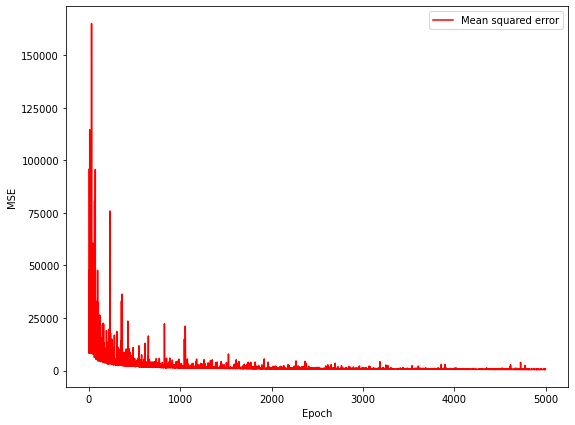

In [97]:
mse = history.history['loss']

epochs = range(len(mse))

plt.figure(figsize=(9, 7))
plt.plot(epochs, mse, 'r', label='Mean squared error')
plt.legend(loc=0)
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.show()

In [94]:
# Preparing input for the model 
x = xtest[X.columns].values.astype('float32')
x = np.reshape(x, (1, X.shape[1]))

# Predicting 
model.predict(x)

array([[1146.3372]], dtype=float32)